# プロジェクト

In [31]:
import pandas as pd
import numpy as  np
import csv
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
%matplotlib inline

# 必要なモジュールがあれば適宜追加してください

## Q1
UCI Machine Learning Repositoryに公開されているワインの品質データセットを用いて、ワインの理化学検査結果に基づく特徴量からワインの品質を予測することを考えます。

以下では***白ワイン***のデータセットを使用します。（赤ワインのデータセットではないことに注意してください）

[Wine Quality Data Set ](https://archive.ics.uci.edu/ml/datasets/wine+quality)

各ワインのデータは以下の11種類の特徴量からなります。
- 1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 

また、各ワインには0から10の品質スコアが付与さています。11種類の特徴量を元にワインの品質を高品質（ワインのqualityが6以上）、低品質（ワインのqualityが6未満）の2値にして予測する2クラス分類問題を考えます。

データ分析の実践のノートブック（practical_ds.ipynb）を参考に、以下に従ってワインの品質を2クラス分類として予測するモデルの学習と評価を行う一連のコードを実装しその実行結果を表示した上で、以下の各Qについて考察を記述してください。その他に工夫した点があればそれについても記述をしてください。授業で扱った内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

- データの観察
    - Q. それぞれの特徴量の記述統計量、ばらつき・分布はどのようになっているでしょうか
    - Q. 欠損値、外れ値、重複データの処理は必要でしょうか
    - Q. 特徴量間の相関はどのようになっているでしょうか

- モデルの学習
    - データセットを訓練データとテストデータに分けます。テストデータは最終的に選択したモデルの評価に使います。訓練データは交差検証に使いモデルの選択と評価を行います。
    - ワインの品質を2クラス分類として予測するためのモデルとしてロジスティック回帰を考えます
        - 比較のためにその他のモデル（ランダムフォレスト、SVM、ニューラルネットワークなど）を使ってもらってもよいですが、それだけを持って大きく加点することはありません
    - 単純な特徴量を元に、モデルの基本となる精度を確認しましょう
         - Q. 単純なモデルとしてどのような特徴量を使うのがよいでしょうか
         - Q. どのような評価尺度を使うのがよいでしょうか
             - accuracy, precision, recall, f値など
         - Q. 単純なモデルではどの程度の精度が期待できるでしょうか
- モデルの選択と評価
    - モデルを複雑にして精度を向上させることを考えます
         - Q. どのような特徴量を作成・選択すればよいでしょうか
             - 特徴量作成：非線形変換、交差項、多項式、ドメイン知識の利用など
             - 特徴量選択：探索、相関・情報量、モデルベースなど
         - 訓練データを交差検証に使い、モデルの評価をしましょう
            - Q. どのような評価尺度を使うのがよいでしょうか
                - accuracy, precision, recall, f値など
            - Q. 単純なモデルに比べてどれぐらい精度が向上したでしょうか。どのような要因で精度が向上したのでしょうか 
    - モデルの複雑性は適切でしょうか
        - Q. アンダーフィッティング（High Bias）やオーバーフィッティング（High Variance）になっていないか確認しましょう
        - Q. もしHigh BiasやHigh Varianceの場合はどのように対処すればよいでしょうか
    - 最終的に選択したモデルをテストデータで評価しましょう
        - Q. 選択したモデルではどの程度の精度が期待できるでしょうか
        - Q. 今回のモデルを実際にワイン工場で品質予測システムとして実展開するにはどのようなことを検討する必要があるでしょうか

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

In [32]:
# 白ワインデータセットの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";")

In [33]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [40]:
print('データセットのサイズ: ', len(wine))
wine = wine.drop_duplicates()
print('重複を取り除いたあとのデータセットのサイズ: ', len(wine))

データセットのサイズ:  4898
重複を取り除いたあとのデータセットのサイズ:  3961


In [41]:
# 特徴量
X=wine[ ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

# 正解ラベルを1（高品質：ワインのqualityが6以上）か0（低品質：ワインのqualityが6未満）とする
y=wine['quality'].values
y = (y>=6).astype(np.int) 
print(np.sum(y==1, axis=0)) # 高品質ワインデータの数
print(np.sum(y==0, axis=0)) # 低品質ワインデータの数

2613
1348


### 参考
すべての特徴量を使ってロジスティック回帰によりワイン品質の分類をしてみます

In [42]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y) 

# ロジスティック回帰モデル
lr = LogisticRegression()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
norm_X_train =  sc.transform(X_train)
norm_X_test =  sc.transform(X_test)
   
lr.fit(norm_X_train, y_train)    
y_pred = lr.predict(norm_X_test)

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

# 特徴量ごとのパラメータ重み
pd.DataFrame(lr.coef_, index=['weight'], columns=wine.drop("quality", axis=1).columns.values)

[[ 74  61]
 [ 41 221]]
0.743073047858942
0.7836879432624113
0.8435114503816794
0.8125


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
weight,0.028152,-0.563924,0.074418,0.721321,0.017294,0.229334,-0.077017,-0.811988,0.246117,0.232714,0.852899


多項式による特徴量作成と正則化を元にモデル選択と評価をしてみます。 `LogisticRegression()`の引数`C`の値の逆数が正則化項の係数になることに注意してください。

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

以下では、`cross_validate`を用いて複数の評価尺度（precision, recall, f1)で交差検証をしています。

[cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

In [43]:
degree=[1,2,3]
C=[100, 10, 1, 0.1, 0.01]
for n in degree:
    for r in C:
        pipe = make_pipeline(PolynomialFeatures(degree=n), StandardScaler(), LogisticRegression(C=r))
        scores=cross_validate(pipe, X_train, y_train, cv=10, scoring=('precision', 'recall', 'f1'),return_train_score=True)
        print(n, r, scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1'].mean())

1 100 0.7818609098577295 0.8634745762711864 0.8204280189876156
1 10 0.7821438816160383 0.8634745762711864 0.8205889581147575
1 1 0.7832547522424059 0.8647475658131988 0.8218148033556449
1 0.1 0.7816136920485162 0.8655968265416517 0.8213191687050369
1 0.01 0.776565492421239 0.8626181031373964 0.8171934113216179
2 100 0.7969180262876285 0.8596429859358097 0.8268386865450582
2 10 0.7961186876767499 0.8604922466642625 0.8268286025846446
2 1 0.7933749523233389 0.8609195816804904 0.8255758912796344
2 0.1 0.7897771890922087 0.8600685178507032 0.8232442674520414
2 0.01 0.793847076336412 0.8562423368193294 0.8236315392637443
3 100 0.8029245330812914 0.8511323476379372 0.8261344750070432
3 10 0.8015040487819782 0.8562351244139921 0.8278527422281285
3 1 0.8015221404484457 0.8600649116480348 0.829673176049222
3 0.1 0.7969414331720905 0.8621961774251714 0.828139171937994
3 0.01 0.8013714898950062 0.8498575549945906 0.8247338821236141


In [37]:
degree=[1,2,3]
C=[100, 10, 1, 0.1, 0.01]
for n in degree:
    for r in C:
        pipe = make_pipeline(PolynomialFeatures(degree=n), StandardScaler(), LogisticRegression(C=r))
        scores=cross_validate(pipe, X_train, y_train, cv=10, scoring=('precision', 'recall', 'f1'),return_train_score=True)
        print(n, r, scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1'].mean())

1 100 0.7725666325171728 0.8772422279492001 0.8213039107093701
1 10 0.7725666325171728 0.8772422279492001 0.8213039107093701
1 1 0.7730323362253124 0.8772422279492001 0.8215654682226837
1 0.1 0.772885389910934 0.8789475517169325 0.822248883009407
1 0.01 0.770320453545932 0.8724640709526131 0.8179545402241821
2 100 0.793399068117757 0.8639386129878572 0.8269081471154175
2 10 0.793406948153882 0.8649636646467462 0.8273543720406247
2 1 0.7930363124846657 0.8670102853428061 0.8281112492937371
2 0.1 0.7854310451953606 0.8697406607694272 0.8251508524944015
2 0.01 0.7877481556944512 0.865987555431729 0.8247356629078414
3 100 0.8061056789486007 0.8516542453158739 0.8281237524070765
3 10 0.8024648602436486 0.8564242761951195 0.8283614925773024
3 1 0.800363822067097 0.8632502147616726 0.8304493884979516
3 0.1 0.7953480780617727 0.8687098047410089 0.8302110405455027
3 0.01 0.7919274628011839 0.857124283160363 0.8228919352663013


交差検証の結果から、多項式の次数を3、正則化のハイパーパラメータを1としたモデルを採用してテストデータで評価してみます。

In [44]:
lr = LogisticRegression(C=1) # ロジスティック回帰モデル

# 多項式
poly=PolynomialFeatures(degree=3)
poly_X_train=poly.fit_transform(X_train)
poly_X_test=poly.transform(X_test)

# 標準化
sc = StandardScaler()
norm_X_train =  sc.fit_transform(poly_X_train)
norm_X_test =  sc.transform(poly_X_test)
   
lr.fit(norm_X_train, y_train)     
y_pred = lr.predict(norm_X_test)

print('重複除く')
print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

重複除く
[[ 78  57]
 [ 48 214]]
0.7355163727959698
0.7896678966789668
0.816793893129771
0.8030018761726079


In [38]:
lr = LogisticRegression(C=1) # ロジスティック回帰モデル

# 多項式
poly=PolynomialFeatures(degree=3)
poly_X_train=poly.fit_transform(X_train)
poly_X_test=poly.transform(X_test)

# 標準化
sc = StandardScaler()
norm_X_train =  sc.fit_transform(poly_X_train)
norm_X_test =  sc.transform(poly_X_test)
   
lr.fit(norm_X_train, y_train)     
y_pred = lr.predict(norm_X_test)

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[109  55]
 [ 30 296]]
0.826530612244898
0.8433048433048433
0.9079754601226994
0.8744460856720828


precision-recall曲線

[precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

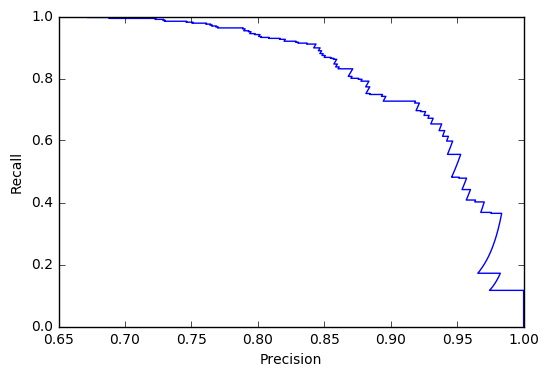

In [39]:
y_pred_proba=lr.predict_proba(norm_X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall');

## Q2
課題4で使用した各行に講義名のテキストデータが含まれている"course_list.csv"ファイルについて、講義名に"統計"または"データ"または"情報"を含む講義を以下のように抽出します。

本学で開講されている統計、情報関連の講義の全体像について分かりやすく提示することを考え、そのためのコードを実装しその実行結果を表示した上で、分析の方針、得られた結果、工夫した点について考察を記述してください。授業で扱った内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

例1:
- 講義名に含まれる単語間の共起を計算する
- "統計", "データ", "情報"がそれぞれどのような単語と共起しているか統計量を計算し可視化する
- 単語間共起からネットワークを作成し分析・可視化することもできる

例2:
- 各講義のベクトルを作成する
- 講義をクラスタリングする（ベクトル間の距離・類似尺度やクラスタ数は適切に決定する）
- クラスタに含まれる講義のテキストデータからそのクラスタにラベルをつける
- 各クラスタの大きさやラベルを可視化する

例3:
- 各講義のベクトルを作成する
- 講義間の類似度を計算する
- 類似度が一定以上の講義間にリンクがあるとして、講義ネットワークを作成する
- ネットワークを分析・可視化する

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

In [14]:
with open('course_list.csv', 'r',  encoding="utf-8") as f:
    dataReader = csv.reader(f)
    for row in dataReader:
        if "統計" in row[0] or "データ" in row[0] or "情報" in row[0]:
            print (row[0])

生態統計学
情報科教育法II
情報科教育法I
心理統計学
情報生物学実習
心理統計実習
統計力学演習[数理自然科学コース]
確率統計II
統計力学II[数理自然科学コース]
統計力学I[数理自然科学コース]
統計力学演習[物質基礎科学コース]
統計力学II[物質基礎科学コース]
統計力学I[物質基礎科学コース]
確率統計I
情報と計算の物理[数理自然科学コース]
情報と計算の物理[物質基礎科学コース]
数理情報学
統計力学I[統合生命科学コース]
情報工学V
統計学II
総合情報学特論II
人間情報学I
情報工学V（１）
総合情報学特論I
地理情報分析基礎II
人間情報学I（１）
地理情報分析基礎I
統計学実習[広域システムコース]
統計学[国際環境学コース]
総合情報学実習
人間情報学IV
人間情報学III（１）
人間情報学I（３）
人間情報学I（２）
人間情報学VI
人間情報学V
情報数理科学VII
統計学[総合情報学コース]
情報工学実験
情報工学VII
人間情報学III
情報数理科学VI
応用地理情報分析
統計学I[広域システムコース]
情報数理科学I[広域システムコース]
統計学実習[総合情報学コース]
情報数理科学II[広域システムコース]
情報数理科学演習I
情報数理科学演習II
情報数理科学Ⅳ
情報数理科学III（３）
情報数理科学III（１）
情報数理科学III
情報数理科学II[総合情報学コース]
情報数理科学I[総合情報学コース]
情報数理科学III（２）
情報工学VI
情報工学III
情報工学II（３）
情報工学II（２）
情報工学II（１）
情報工学II
情報工学I
情報工学II（４）
情報工学IV
総合情報学特論IV
総合情報学特論III
特殊研究演習「国際関係データ分析」
特殊講義「社会科学のための統計分析」
特殊研究演習「社会統計分析」
言語情報処理I[言語態・テクスト文化論コース]
言語データ分析基礎
言語情報処理I[学際言語科学コース]
言語情報処理II[学際言語科学コース]
健康空間情報科学
経済データ分析
上級数理統計Ⅱ
上級数理統計Ⅰ
金融データと金融モデル分析
統計
人口統計
経済統計
数理統計Ⅱ
統計Ⅰ
統計Ⅱ
数理統計
数理統計Ⅰ
情報経営
応用統計
生物統計学
医薬品情報学
統計学I
特別講義　情報社会と法
学校はデ